Best Tour:  [208, 200, 201, 177, 151, 115, 101, 96, 104, 122, 178, 180, 202, 213, 187, 171, 132, 164, 163, 141, 160, 159, 139, 135, 116, 117, 129, 130, 145, 172, 198, 203, 204, 226, 227, 228, 131, 114, 125, 126, 127, 102, 98, 92, 95, 59, 57, 56, 58, 60, 82, 91, 106, 136, 146, 147, 185, 223, 224, 234, 221, 218, 210, 192, 149, 118, 93, 79, 80, 81, 90, 94, 105, 107, 99, 111, 133, 134, 144, 143, 142, 197, 196, 161, 162, 123, 108, 85, 110, 124, 179, 188, 220, 233, 215, 206, 193, 138, 75, 63, 44, 43, 62, 165, 173, 214, 222, 225, 235, 236, 237, 211, 175, 137, 120, 76, 69, 70, 64, 53, 54, 71, 72, 77, 86, 109, 100, 84, 68, 41, 35, 22, 17, 3, 7, 12, 20, 27, 19, 8, 14, 15, 26, 47, 61, 119, 176, 184, 167, 148, 128, 74, 65, 55, 29, 24, 23, 31, 32, 36, 37, 34, 33, 30, 10, 11, 21, 186, 209, 217, 219, 216, 150, 103, 97, 87, 89, 88, 18, 16, 1, 9, 5, 6, 2, 4, 13, 25, 28, 46, 45, 52, 51, 50, 42, 66, 73, 78, 112, 113, 169, 168, 153, 152, 154, 155, 170, 199, 212, 195, 194, 182, 181, 174, 166, 156, 157, 158

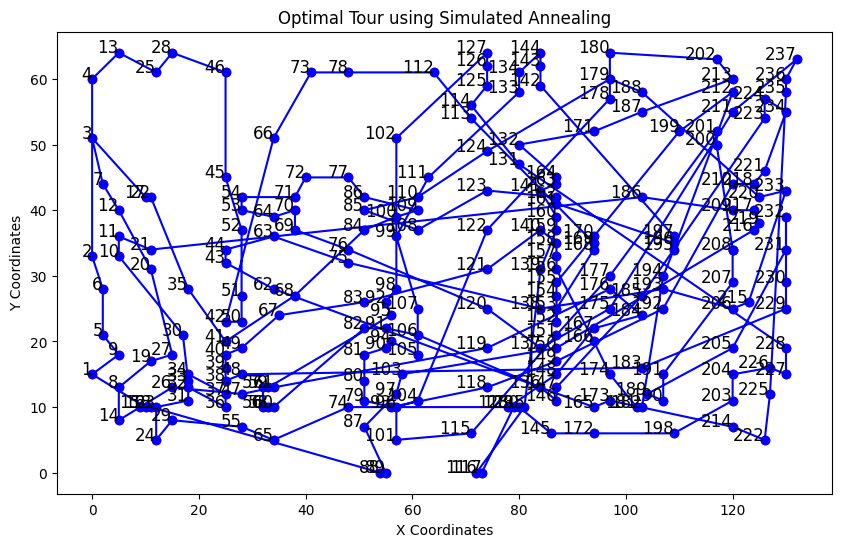

In [ ]:
import numpy as np
import random
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

def read_tsp_file(file_path):
    locations = {}
    with open(file_path, 'r') as file:
        found_section = False
        for line in file:
            line = line.strip()
            if line == "NODE_COORD_SECTION":
                found_section = True
                continue
            if found_section and line == "EOF":
                break
            if found_section:
                parts = line.split()
                if len(parts) == 3:
                    try:
                        node_id = int(parts[0])
                        x = float(parts[1])
                        y = float(parts[2])
                        locations[node_id] = (x, y)
                    except ValueError:
                        print("Error parsing line:", line)
                else:
                    print("Invalid line format:", line)
    return locations

# Calculate the distance matrix from the coordinates
def create_distance_matrix(locations):
    num_locations = len(locations)
    distance_matrix = np.zeros((num_locations, num_locations))

    coordinates = list(locations.values())
    for i in range(num_locations):
        for j in range(i + 1, num_locations):
            dist = distance.euclidean(coordinates[i], coordinates[j])
            distance_matrix[i][j] = dist
            distance_matrix[j][i] = dist

    return distance_matrix

# Simulated Annealing function for TSP
def simulated_annealing(distance_matrix, initial_temp, cooling_rate, num_iterations):
    num_locations = len(distance_matrix)

    # Initial random tour
    current_tour = list(range(num_locations))
    random.shuffle(current_tour)
    current_cost = calculate_cost(current_tour, distance_matrix)

    best_tour = current_tour[:]
    best_cost = current_cost

    temperature = initial_temp

    for iteration in range(num_iterations):
        # Generate a neighboring tour by swapping two cities
        new_tour = current_tour[:]
        i, j = random.sample(range(num_locations), 2)
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i]

        new_cost = calculate_cost(new_tour, distance_matrix)

        # Accept new solution based on acceptance probability
        cost_diff = new_cost - current_cost
        acceptance_prob = math.exp(-cost_diff / temperature) if cost_diff > 0 else 1

        if random.random() < acceptance_prob:
            current_tour, current_cost = new_tour, new_cost

        # Update best solution found
        if current_cost < best_cost:
            best_tour, best_cost = current_tour, current_cost

        # Cool down
        temperature *= cooling_rate

    return best_tour, best_cost

# Calculate the total cost of a tour
def calculate_cost(tour, distance_matrix):
    return sum(distance_matrix[tour[i]][tour[i + 1]] for i in range(len(tour) - 1)) + distance_matrix[tour[-1]][tour[0]]

# Plotting the tour
def plot_tour(locations, tour, title):
    coordinates = [locations[node] for node in list(locations.keys())]

    x = [coordinates[i][0] for i in tour] + [coordinates[tour[0]][0]]
    y = [coordinates[i][1] for i in tour] + [coordinates[tour[0]][1]]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.scatter(x, y, c='red')

    # Adjusted the loop to avoid IndexError
    for i in range(len(tour)):
        plt.text(x[i], y[i], f'{tour[i] + 1}', fontsize=12, ha='right')

    plt.title(title)
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.show()

# Main function to read TSP file and solve TSP using Simulated Annealing
def main():
    file_path = "/content/xqg237.tsp"  # Replace with the path to your TSP file
    locations = read_tsp_file(file_path)
    distance_matrix = create_distance_matrix(locations)

    # Parameters for simulated annealing
    initial_temperature = 1000
    cooling_rate = 0.995
    num_iterations = 90000

    # Solve TSP using Simulated Annealing
    best_tour, best_cost = simulated_annealing(distance_matrix, initial_temperature, cooling_rate, num_iterations)

    # Display results
    print("Best Tour: ", [list(locations.keys())[i] for i in best_tour])
    print("Minimum Cost: ", best_cost)

    # Plotting the best tour
    plot_tour(locations, best_tour, "Optimal Tour using Simulated Annealing")

if __name__ == "__main__":
    main()